### ```AUTOR:``` MARTIN PEREZ MAGALLANES
### ```FECHA:``` 20/06/2021
### ```MATERIA:``` MATEMATICA 3

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as seabornInstance

```Creamos formulas para graficar y no repetir codigo```

In [222]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
def create_scatter(tabla,relacion1,relacion2):
    """
        Parametros:
            tabla: DataFrame de pandas
            relacion1: Recibira el string del nombre de la columna que se desea la relacion. 
            relacion2: Recibira el string del nombre de la columna que se desea la relacion.
        La funcion devolvera un grafico de scatter clasificando con colores los datos por arriba y por debajo de su media.
    """
    colores=['orange','blue']
    tamanios=[30,60]
    f1 = tabla[relacion1].values
    f2 = tabla[relacion2].values
    asignar=[]
    for index, row in tabla.iterrows():
        if(row[relacion1]>tabla[relacion1].mean()):
            asignar.append(colores[0])
        else:
            asignar.append(colores[1])
    plt.scatter(f1, f2, c=asignar, s=tamanios[0])
    plt.show()

def create_scatter_regression(x,y,predic):
    """
        Parametros:
            x:  El array de entrenamiento o de test de la variable ultilizada para estudiar el comportamiento de y
            y:  El array de entrenamiento o de test de la variable a ser estudiada
            predic: Es la prediccion lineal la cual se utilizara para graficar la recta de regrecion lineal.
    """
    colores=['orange','blue']
    tamanios=[30,60]
    f1 = x[:,0]
    f2 = y
    asignar=[]
    for row in f1:
        if(row>f1.mean()):
            asignar.append(colores[0])
        else:
            asignar.append(colores[1])
    plt.scatter(f1, f2, c=asignar, s=tamanios[0])
    plt.plot(f1, predic,'red', linewidth=3)
    plt.show()

## ```Leemos el archivo csv y lo cargamos como un dataset de Pandas. Y vemos su tamaño```

In [223]:
info= pd.read_csv("seguro.csv")
info.shape

(1338, 7)

## ```Veamos las primeras filas```

In [224]:
info.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## ```Vamos a transformar las variables descriptivas en categoricas, la region no la tomaremos para el analisis```

In [225]:
labelencoder=LabelEncoder()
infoUse=info[['age','sex','bmi','region', 'children','smoker','charges']]
infoUse['catSex']=labelencoder.fit_transform(infoUse['sex'])
infoUse['catSmoker']=labelencoder.fit_transform(infoUse['smoker'])

## ```Veamos algunas estadísticas básicas de nuestros datos de entrada:```

Aqui vemos que la media de edades en los seguros es de 39. La minima edad es de 18 y la persona mas grande es de 64. Varemos que datos estan relacionados con la edad a ver si tienen algun comportamiento lineal

In [226]:
infoUse.describe()

,age,bmi,children,charges,catSex,catSmoker
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


## ```Hacemos una visualización en general de los datos de entrada:```

En estas gráficas vemos entre qué valores se concentran la mayoría de registros.

Como podemos ver la mayoria de los datos se centran donde charges es mejor a 15000 aproximadamente

C:\Users\Usuario\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


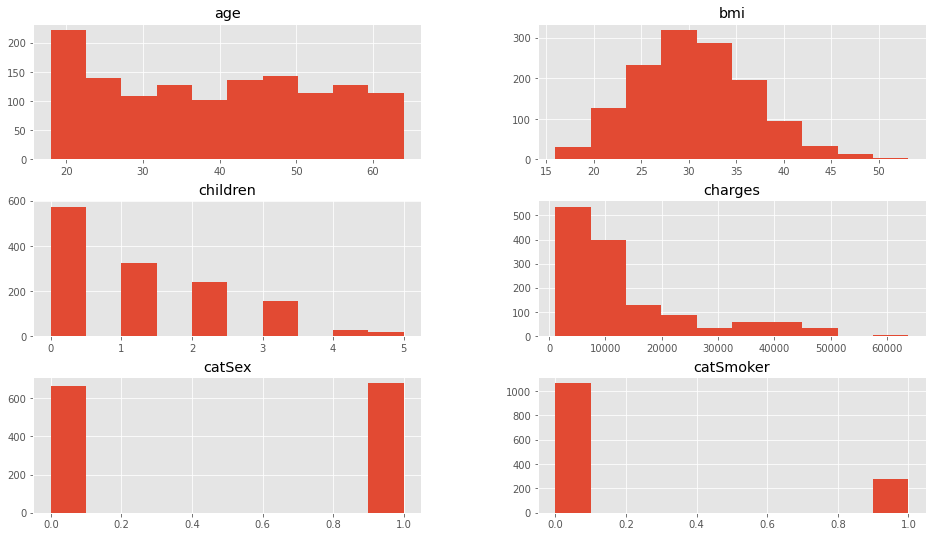

In [227]:
infoUse.hist()
plt.show()

Comprobamos el valor medio de la columna charges

Como podemos ver, la mayoria de los datos stan dentro de los valores 15000

<AxesSubplot:xlabel='charges'>

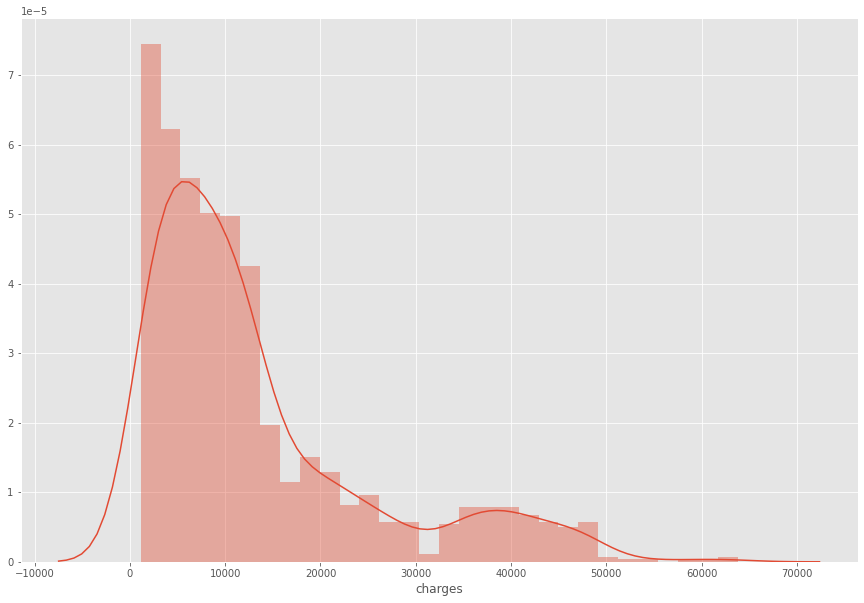

In [228]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(infoUse['charges'])

## ```Como podemos observar en los graficos de abajo, existe una relacion lineal entre la edad respecto a Charges```

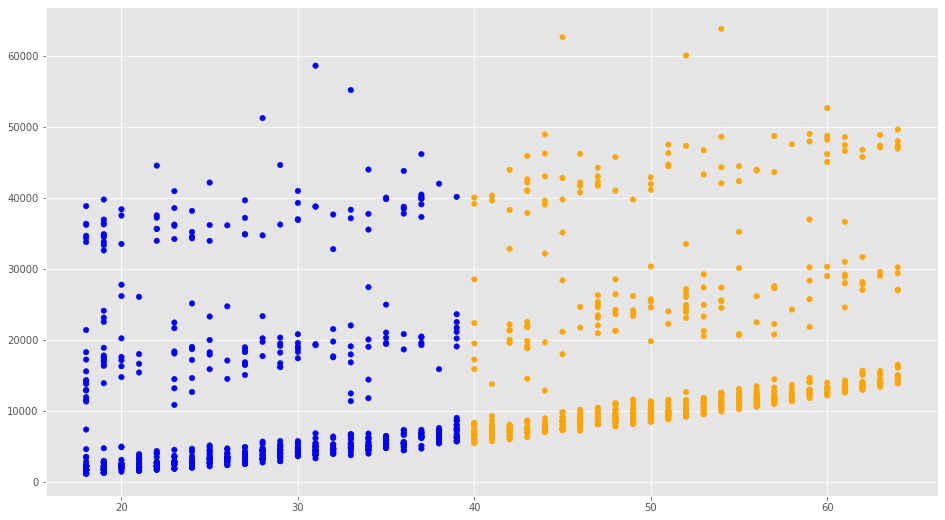

In [229]:
create_scatter(infoUse,'age','charges')

## ```Regresión Lineal```
Vamos a tratar de predecir los datos de charges dado la relacion con la edad
 
Antes que nada vamos a centrarnos en los datos donde mayormente se concentra la informacion que es donde la charges es menor o igual a 15000

1)  Vamos a dividir nuestro universo de datos en datos de entrenamiento y datos de testeo del modelo

2)  Vamos a graficar la regresion lineal con los datos de entrenamiento

3)  Vamos a entrenar el modelo

3)  Vamos a probar el modelo

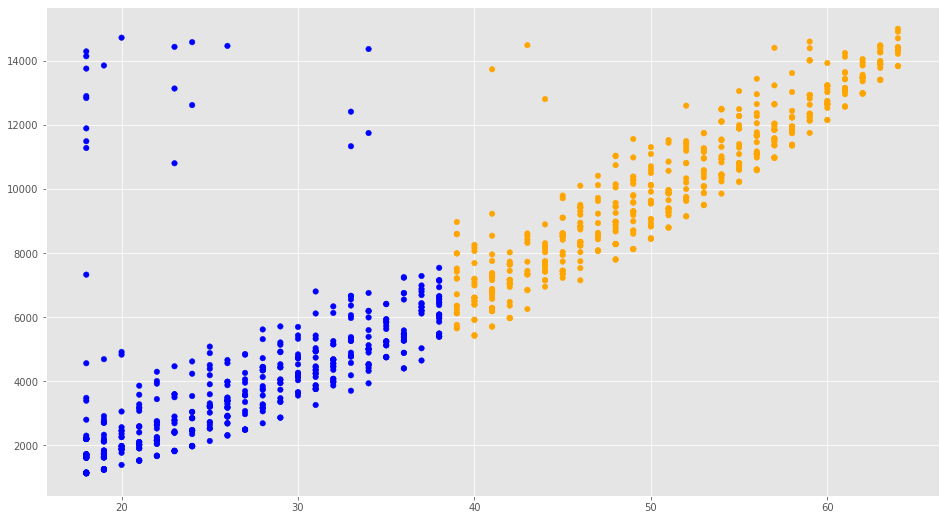

In [230]:
filtered_data = infoUse.query('charges<=15000')
create_scatter(filtered_data,'age','charges')

## ```Vamos a dividir nuestros datos, el 75% de los datos para el conjunto de entrenamiento y el 25% de los datos para el conjunto de prueba```

In [231]:
xTrain,xTest,yTrain,yTest= train_test_split(filtered_data[['age']].values,filtered_data['charges'].values,test_size=0.25)

## ```Entrenamos el modelo```

In [232]:
regr=linear_model.LinearRegression()
regr.fit(xTrain,yTrain)

LinearRegression()

In [233]:
yPredTest=regr.predict(xTest)
yPredTrain=regr.predict(xTrain)

## ```Comparación del valor real y el predecido ```

In [234]:
df = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yPredTest.flatten()})
df

,Actual,Predicted
0,11842.44200,11882.619206
1,14319.03100,13369.296840
2,10577.08700,11387.059994
3,7162.01220,7918.145513
4,7147.10500,8909.263936
...,...,...
240,2219.44510,1971.434975
241,9855.13140,10148.161965
242,13470.86000,12873.737629
243,4667.60765,5440.349456


```También podemos visualizar el resultado de la comparación como un gráfico de barras. 

Como el número de registros es enorme, para fines de representación vamos a tomar 25 registros.```

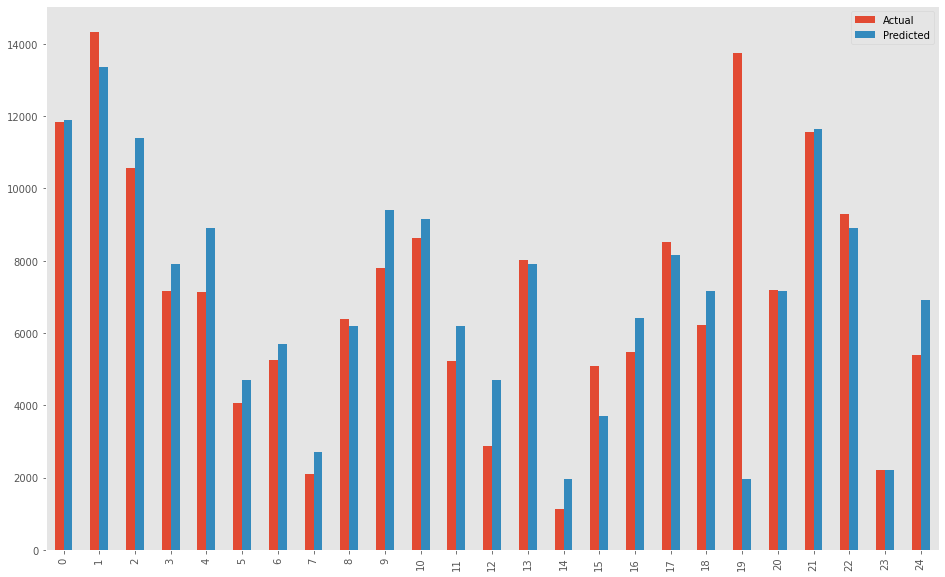

In [252]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## ```Revisamos como nos quedo los graficos de regresion lineal tanto de entrenamiento como en los datos de test```

1) Grafico con datos de entrenamiento

2) Grafico con datos de test

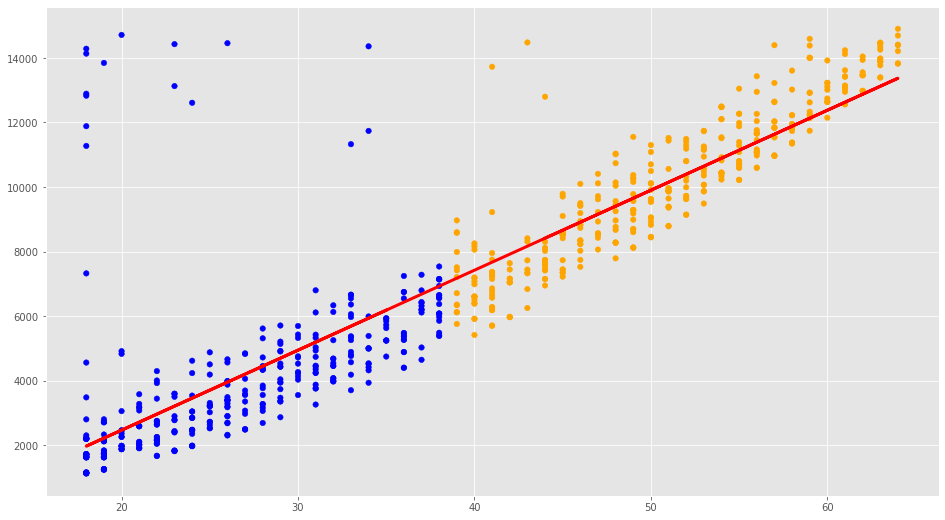

In [236]:
create_scatter_regression(xTrain,yTrain,yPredTrain)


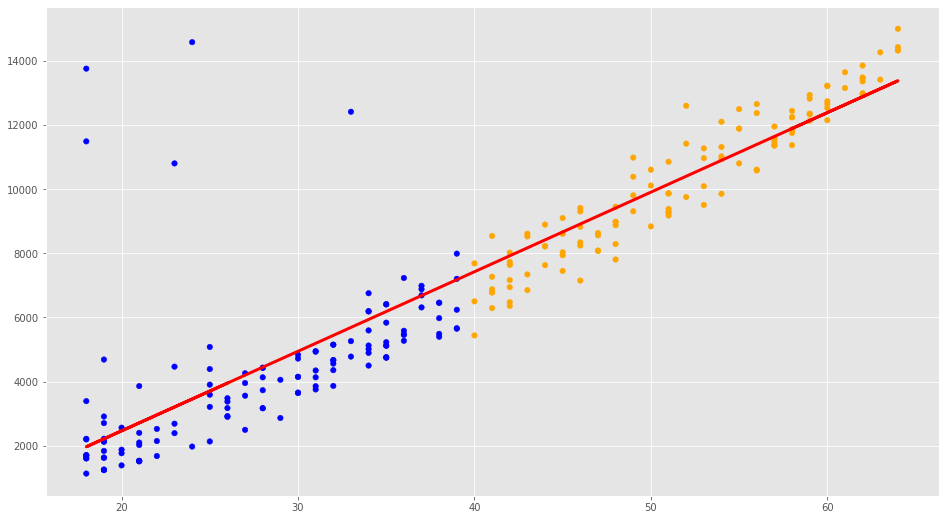

In [237]:
create_scatter_regression(xTest,yTest,yPredTest)

In [238]:
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(yTest, yPredTest))  
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(yTest, yPredTest, squared=True))  
print('Error cuadrático medio de raíz (RMSE):', np.sqrt(metrics.mean_squared_error(yTest, yPredTest)))

Error Medio Absoluto (MAE): 880.3322910266239
Error cuadrático medio (MSE): 2565819.5901373806
Error cuadrático medio de raíz (RMSE): 1601.8175895330219


```Se puede ver que el valor Raíz del error cuadrático medio 1601.81, lo cual es casi el 10% del valor medio de los valores de todos los Charges, es decir, 13270.42. Esto significa que nuestro algoritmo no fue muy preciso pero aún así puede hacer predicciones razonables.```
```Para que sea considerado una buena prediccion el valor RMSE deberia de rondar entre  5% del valor de la media.```

## ```Primera Prediccion```

In [239]:
primeraPrediccion = regr.predict([[26]])
print(int(primeraPrediccion))

3953


# ```Mejoremos un poco el modelo con regresion lineal Multiple```

Vamos a intentar mejorar el modelo con un par de variables mas

In [247]:
xTrainMult,xTestMult,yTrainMult,yTestMult= train_test_split(filtered_data[['age','bmi']].values,filtered_data['charges'].values,test_size=0.25)
regrMult=linear_model.LinearRegression()
regrMult.fit(xTrainMult,yTrainMult)
yPredMult=regrMult.predict(xTestMult)

In [248]:
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(yTestMult, yPredMult))  
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(yTestMult, yPredMult, squared=True))  
print('Error cuadrático medio de raíz (RMSE):', np.sqrt(metrics.mean_squared_error(yTestMult, yPredMult)))

Error Medio Absoluto (MAE): 843.0148512797767
Error cuadrático medio (MSE): 1957454.2932012964
Error cuadrático medio de raíz (RMSE): 1399.090523590699


``` Nuevamente nuestro modelo sigue sin ser muy preciso.

Hay factores que pueden haver contribuido a esta inexactitud, por ejemplo: 

1.  Se necesitan mas datos para entrenar el modelo con el fin de que se entrene correctamente 
2.  Atributos Pobres, los atributos que utilizamos pueden que no tengan una suficiente correlacion
```

In [249]:
segundaPrediccion = regrMult.predict([[26,25.5]])
print(int(segundaPrediccion))

4081
